In [4]:
import numpy as np
import pandas as pd
import os

In [5]:
dataset_dir = 'dataset/original_data'

datasets = os.listdir(dataset_dir)
datasets_df = pd.DataFrame({'filenames': datasets})

In [ ]:
classes = ['concentrating', 'neutral']#, 'relaxed']
datasets_by_class = {'concentrating':[], 'neutral':[], 'relaxed':[]}
window_size = 256 #samples


for class_name in classes:
    datasets = datasets_df[datasets_df['filenames'].str.contains(class_name)]

    for filename in datasets['filenames']:
        sub_df = pd.read_csv(f"{dataset_dir}/{filename}") 

        windows = []
        cur_window = []
        sample_count = 0

        row=0
        while row < sub_df.shape[0]:
            sample_count+=1
            cur_window.append(sub_df.iloc[row])

            if sample_count == window_size:
                windows.append(cur_window)
                cur_window = []
                sample_count = 0
                # print(len(windows))
                row-=window_size//2

            row+=1

        # datasets_by_class[class_name].append(np.array(windows))
        datasets_by_class[class_name]+=windows

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
1
2
3
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
5

In [59]:
concentrating_data = np.asarray(datasets_by_class['concentrating'], dtype='object')
neutral_data = np.asarray(datasets_by_class['neutral'], dtype='object')
# relaxed_data = np.asarray(datasets_by_class['relaxed'], dtype='object')

In [60]:
print(concentrating_data.shape)
print(neutral_data.shape)
# print(relaxed_data.shape)

(423, 256, 6)
(422, 256, 6)


In [7]:
matrix = concentrating_data[0][:,1]
print(matrix.shape)

(256,)


In [8]:
# One sample
concentrating_data[0]

array([[1533223253.545, 11.719, 25.879, -240.234, 24.902, 70.801],
       [1533223253.549, 9.766, 24.414, -465.82, 18.555, 64.941],
       [1533223253.553, 13.672, 29.785, -401.367, 10.254, 33.691],
       ...,
       [1533223254.533, 15.625, 27.344, 254.883, 14.648, 58.594],
       [1533223254.537, 12.207, 28.809, 340.82, 19.531, 18.555],
       [1533223254.541, 7.812, 30.273, 333.008, 18.066, -30.762]],
      dtype=object)

In [39]:
X = concentrating_data[:, :, 1:5]  # Remove the first column
X = np.concatenate([X, neutral_data[:, :, 1:5]], axis=0)

y = np.array([0] * concentrating_data[:, :, 1:5].shape[0] + [1] * neutral_data[:, :, 1:5].shape[0])


In [40]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

X, y = shuffle(X, y, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
print(X_train.shape)
print(y_train.shape)

(676, 256, 4)
(676,)


In [42]:
def transform_set(scalar, data, fit=False):
    original_shape = data.shape 
    reshaped = data.reshape(-1, data.shape[-1]) 

    if fit:
        reshaped = scalar.fit_transform(reshaped)
    else:
        reshaped = scalar.transform(reshaped)
        
    reshaped = reshaped.reshape(original_shape)

    return reshaped

In [43]:
#Normalize the data
from sklearn.preprocessing import MinMaxScaler
X_scalar = MinMaxScaler()
X_train_scaled = transform_set(X_scalar, X_train, fit=True)
X_test_scaled = transform_set(X_scalar, X_test, fit=False)

In [44]:
print("X data:", X_train.shape, X_test.shape)
print("y data:", y_train.shape, y_test.shape)

X data: (676, 256, 4) (169, 256, 4)
y data: (676,) (169,)


In [45]:
from tensorflow import keras
from tensorflow.keras import layers

2025-03-15 12:42:52.860523: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742067773.003547     534 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742067773.046962     534 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1742067773.375108     534 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1742067773.375139     534 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1742067773.375142     534 computation_placer.cc:177] computation placer alr

In [ ]:
# Define the input shape (256x4)
input_shape = (256, 4) 

# Build the CNN model
model = keras.Sequential([
    layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(64, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(128, kernel_size=3, activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Two output neurons for two classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_3 (Conv1D)               │ (None, 254, 32)        │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 127, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 125, 64)        │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 62, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 60, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 7680)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       983,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,014,625 (3.87 MB)

 Trainable params: 1,014,625 (3.87 MB)

 Non-trainable params: 0 (0.00 B)

In [55]:
model.fit(X_train_scaled, y_train, epochs=80, validation_data=(X_test_scaled, y_test))

Epoch 1/80
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.5001 - loss: 0.7037 - val_accuracy: 0.6391 - val_loss: 0.6585
Epoch 2/80
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6663 - loss: 0.6218 - val_accuracy: 0.7929 - val_loss: 0.5349
Epoch 3/80
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7774 - loss: 0.4883 - val_accuracy: 0.8107 - val_loss: 0.5095
Epoch 4/80
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8396 - loss: 0.4313 - val_accuracy: 0.5266 - val_loss: 0.7596
Epoch 5/80
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6872 - loss: 0.5881 - val_accuracy: 0.6095 - val_loss: 0.6050
Epoch 6/80
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7850 - loss: 0.4563 - val_accuracy: 0.8225 - val_loss: 0.4817
Epoch 7/80
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7940 - loss: 0.4664 - val_accuracy: 0.8107 - val_loss: 0.4874
Epoch 8/80
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7544 - loss: 0.4634 - val_accuracy: 0.5740 - va

In [18]:
X_train_scaled[0].shape
X_test_scaled[0].shape

(256, 5)

In [56]:
preds = model.predict(X_test_scaled)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


In [57]:
score = 0

for i in range(preds.shape[0]):
    is_equal = (np.round(preds[i]) == np.round(y_test[i]))
    if is_equal:
        score+=1

print(f"{score}/{preds.shape[0]}")

158/169


In [26]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [2]:
import matplotlib.pyplot as plt


In [21]:
def plot_sample(sample):
    variables = ['TP9','AF7','AF8','TP10','Right AUX']

    # Number of samples
    num_samples = sample.shape[0]

    # Create a figure with 5 subplots (1 column and 5 rows)
    fig, axes = plt.subplots(5, 1, figsize=(10, 15))

    # Plot each of the 5 variables in separate subplots
    for i in range(sample.shape[1]):
        axes[i].plot(range(num_samples), sample[:, i], label=f'Variable {i+1}')
        axes[i].set_title(f'{variables[i]}')
        axes[i].set_xlabel('Sample Index')
        axes[i].set_ylabel('Value')
        axes[i].legend()

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Display the plot
    plt.show()

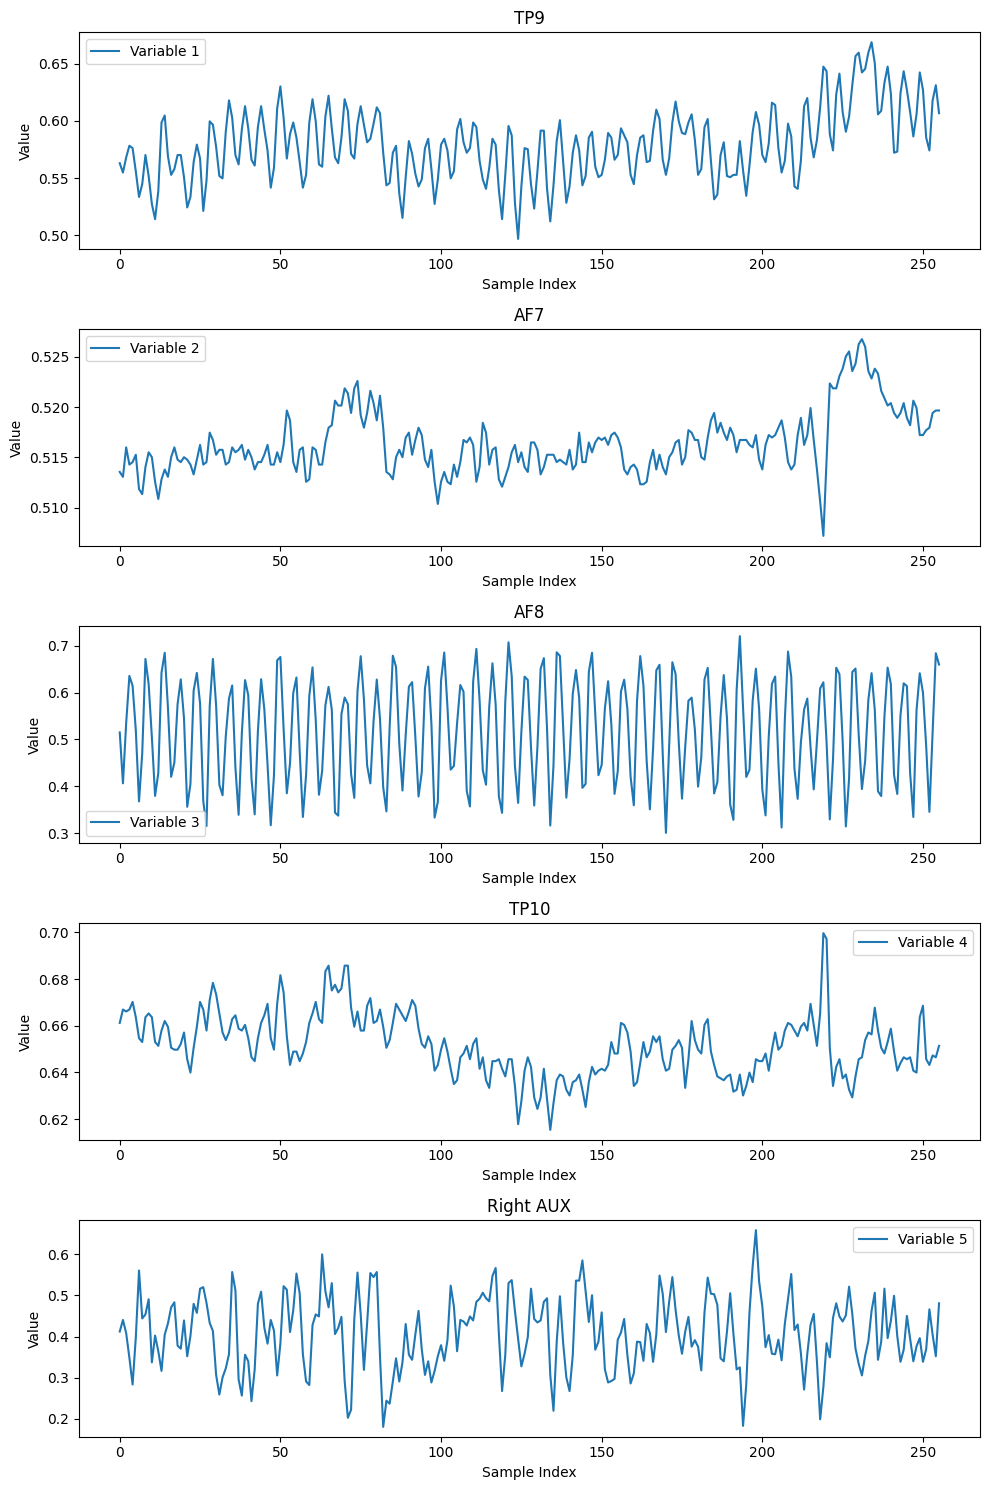

In [27]:
# Concentrated waves
plot_sample(X_train_scaled[0])